# Calories Burnt Prediction using Machine Learning

## Problem Statement
The aim of this project is to predict the calories burnt using machine learning techniques. The data was obtained from [Kaggle](https://www.kaggle.com/fmendes/fmendesdat263xdemos?select=exercise.csv). The attributes are defined as follows: 

- User ID: User ID of the participants 
- Age: Age of the individual
- Height: Height of the individual 
- Weight: Weight of the individual 
- Gender: Sex of the individual 
- Duration: Time duration of the exercise time 
- Heart Rate: Heart rate of the participants 
- Body Temperature: Body temperature of the participants 
- Calories: The burning calories. 

## Objectives
- The dataset provided for calories burnt analysis, we have to analysis the amount of buring calories on the basis of exercise duration. 
- The detailed analysis with can proceed with the exploratory data analysis(EDA) 
- The calories burnt prediction can be done using various machine learning algorithms, choose the best suited model for the calories burnt prediction and finally we save the model in the pickle `.pkl` file.

## Research Questions 
- Is there any relationship between calories burnt and the duration?
- Is there any relationship between calories burnt and weight, heart rate? 

In [1]:
# for data analysis and visualization 
import numpy as np 
import pandas as pd 
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16 
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 16 
sns.set_style('darkgrid')

# preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

# models 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor

# evaluation 
from sklearn import metrics 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Data Exploration - To Know about Dataset

In [2]:
calories = pd.read_csv('../data/calories.csv')

In [3]:
calories.head() 

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise = pd.read_csv('../data/exercise.csv')

In [5]:
exercise.head() 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
# Combined data 
df = pd.concat([exercise, calories['Calories']], axis=1)
df.head() 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
# drop User Id 
df.drop('User_ID', axis=1, inplace=True)
df.head() 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.to_csv("../data/Calories_Burnt.csv", index=False)

In [9]:
df = pd.read_csv('../data/Calories_Burnt.csv')
df.head() 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
# shape 
df.shape

(15000, 8)

In [11]:
# info 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [12]:
# missings 
df.isnull().sum() 

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

__Observations__ 
- There are 15000 rows and 8 columns in this dataset. 
- There is no missing values. 
- The dataset contains 1 categorical variable and the rest of the variables are numeric. 

## Exploratory Data Analysis - Exploring Data with Descriptive Statistics

### Summary Statistics

In [13]:
df_numeric = df.select_dtypes(exclude=['object'])

In [14]:
# summary stats with pandas 
df.describe() 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
# summary stats with researchpy
rp.summary_cont(df_numeric)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,15000.0,42.7898,16.9803,0.1386,42.5180,43.0616
1,Height,15000.0,174.4651,14.2581,0.1164,174.2369,174.6933
2,Weight,15000.0,74.9669,15.0357,0.1228,74.7262,75.2075
3,Duration,15000.0,15.5306,8.3192,0.0679,15.3975,15.6637
4,Heart_Rate,15000.0,95.5185,9.5833,0.0782,95.3652,95.6719
5,Body_Temp,15000.0,40.0255,0.7792,0.0064,40.0130,40.0379
6,Calories,15000.0,89.5395,62.4570,0.5100,88.5400,90.5391


__Observations__
- The average age is 42.78 $\pm$ 16.98

### Correlation between Attributes

In [16]:
df.corr() 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [17]:
rp.corr_pair(df_numeric)

,r value,p-value,N
Age & Height,0.0096,0.2420,15000
Age & Weight,0.0901,0.0000,15000
Age & Duration,0.0132,0.1047,15000
Age & Heart_Rate,0.0105,0.1993,15000
Age & Body_Temp,0.0132,0.1066,15000
Age & Calories,0.1544,0.0000,15000
Height & Weight,0.9585,0.0000,15000
Height & Duration,-0.0046,0.5711,15000
Height & Heart_Rate,0.0005,0.9484,15000
Height & Body_Temp,0.0012,0.8831,15000


### Skewness 

In [18]:
df_numeric.skew() 

Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories      0.505371
dtype: float64

__Observations__
- Age, Weight, Duration and Calories are positively(right) skewed
- Height, Heart Rate and Body Temperature are negatively(left) skewed

### Kurtosis

In [19]:
df_numeric.kurtosis() 

Age          -0.949130
Height       -0.513210
Weight       -0.682057
Duration     -1.184751
Heart_Rate   -0.644220
Body_Temp     0.517306
Calories     -0.717763
dtype: float64

## Qualitaive Univariate Analysis 

In [20]:
rp.summary_cat(df['Gender'])

,Variable,Outcome,Count,Percent
0,Gender,female,7553,50.35
1,,male,7447,49.65


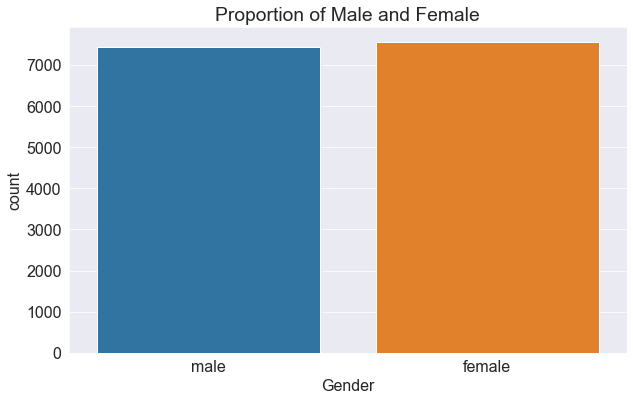

In [21]:
sns.countplot(x=df['Gender'])
plt.title("Proportion of Male and Female")
plt.show() 

## Univariate Visualization

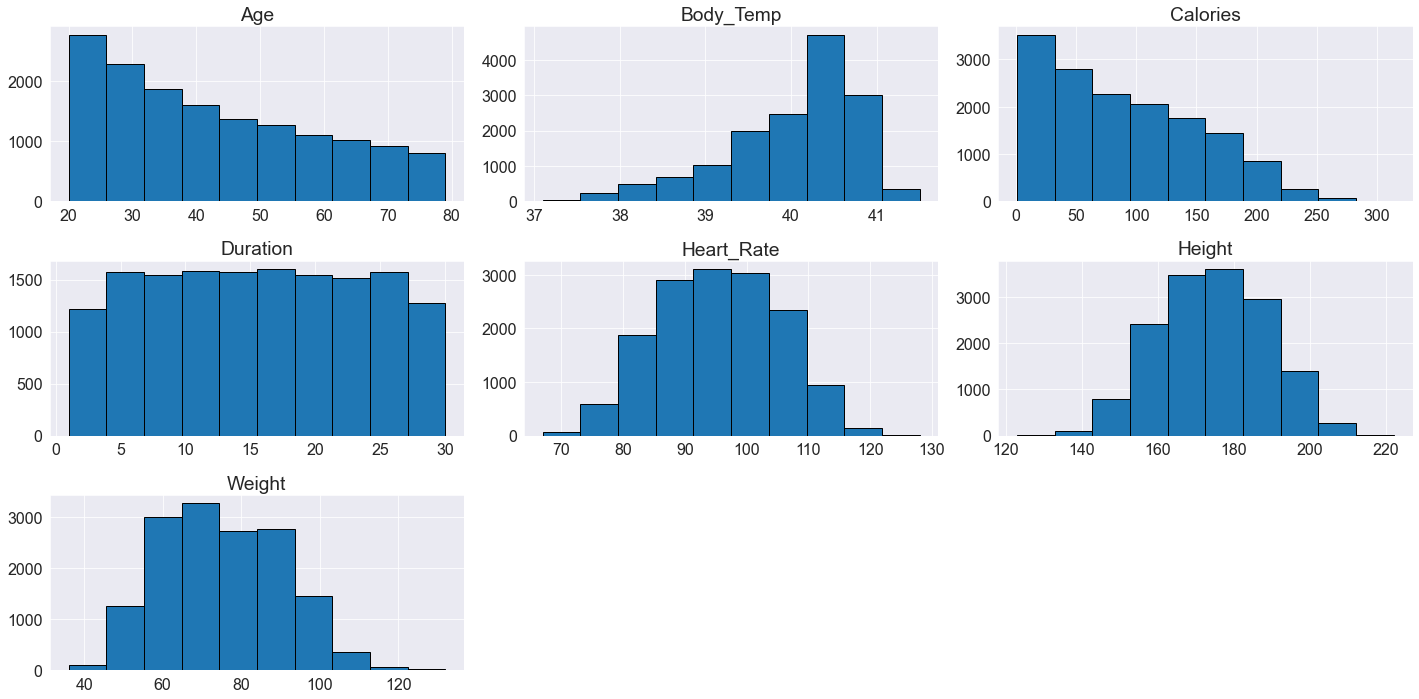

In [22]:
df_numeric.hist(figsize=(20,10),sharex=False, sharey=False, edgecolor="black")
plt.tight_layout() 
plt.show() 

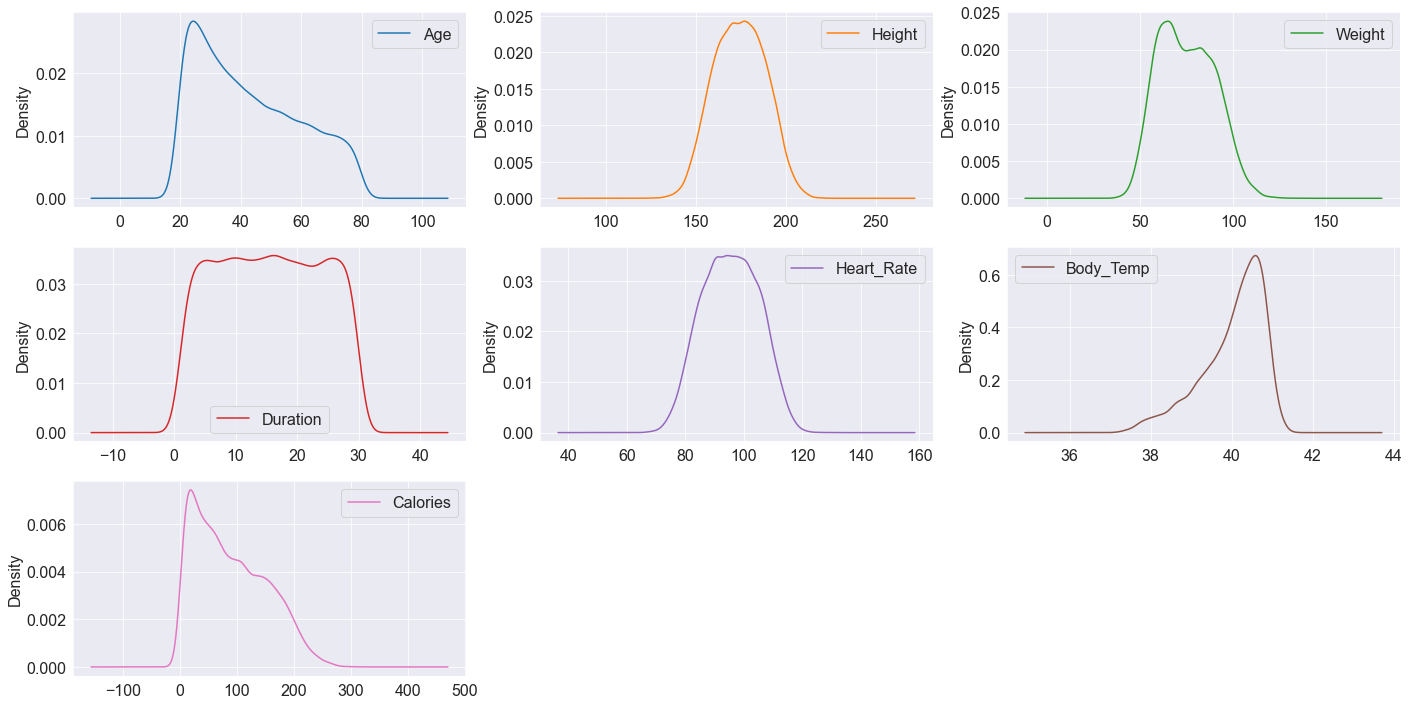

In [23]:
df_numeric.plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(3,3))
plt.tight_layout() 
plt.show() 

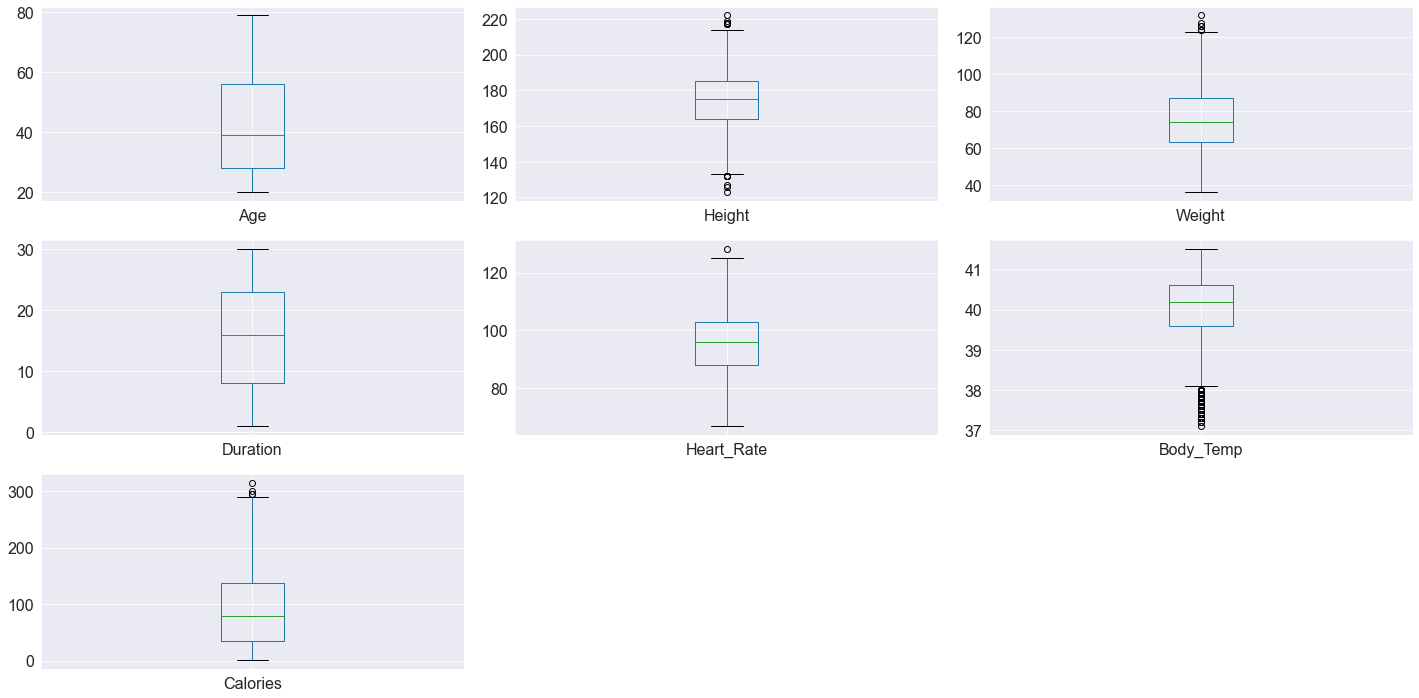

In [24]:
df_numeric.plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(3,3))
plt.tight_layout() 
plt.show() 

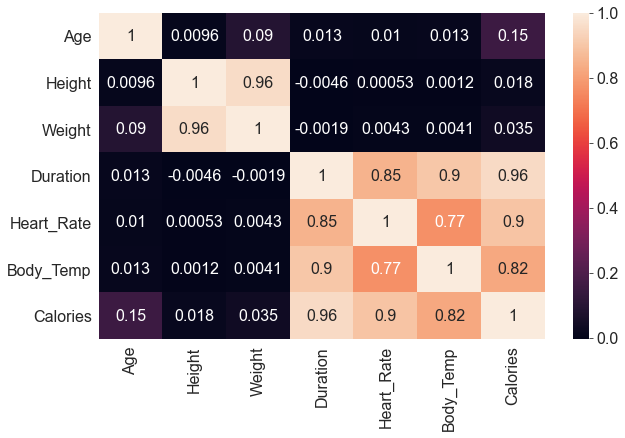

In [25]:
corr = df.corr() 
sns.heatmap(corr, annot=True)
plt.show()

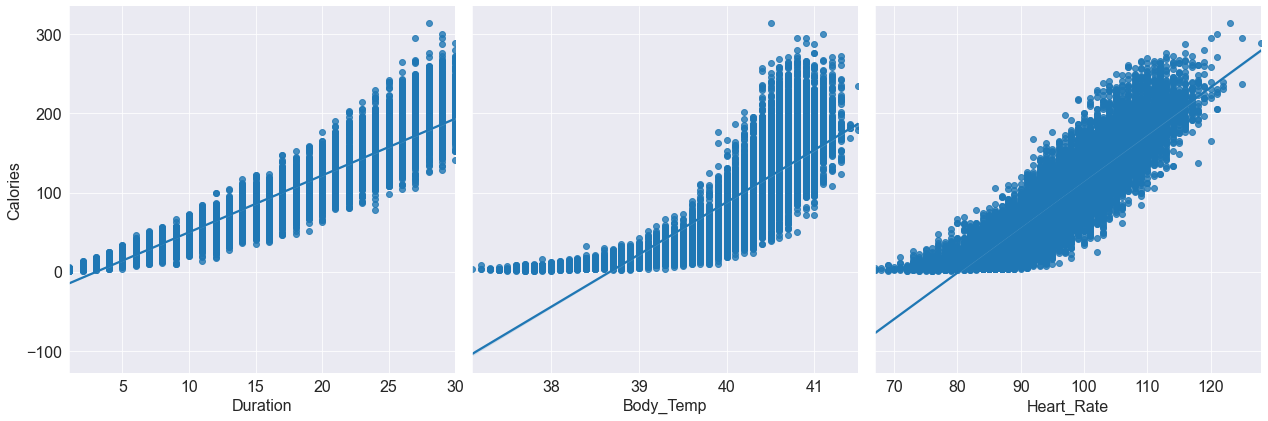

In [26]:
g = sns.pairplot(data=df, kind="reg", 
                 x_vars=['Duration', 'Body_Temp', 'Heart_Rate'], 
                 y_vars=['Calories'], height=6)

## Data Preprocessing for Machine Learning 

In [27]:
# recode gender clumn 
df.replace({"Gender": {"male": 0, "female": 1}}, inplace=True)

In [28]:
df.head() 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [29]:
# Create independent variable 
X = df.drop(columns=['Calories'], axis=1)
# Create dependent variable 
y = df['Calories']

In [30]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [31]:
y.head() 

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

## Splitting Dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [33]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((15000, 7), (12000, 7), (3000, 7), (12000,), (3000,))

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XB', XGBRFRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('SVR', SVR()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [35]:
reg = XGBRFRegressor()
reg.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [36]:
y_pred = reg.predict(X_test)

In [37]:
y_pred

array([ 41.253876,   7.111669,  87.01043 , ..., 102.53582 ,  21.320885,
        19.979687], dtype=float32)

In [38]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(mae)

5.2578808259963985


In [53]:
from lazypredict.Supervised import LazyRegressor

In [40]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [41]:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 42/42 [01:48<00:00,  2.58s/it]


In [42]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                 1.00       1.00  0.73       20.14
LGBMRegressor                                1.00       1.00  1.80        0.19
HistGradientBoostingRegressor                1.00       1.00  1.83        0.81
XGBRegressor                                 1.00       1.00  2.06        0.56
ExtraTreesRegressor                          1.00       1.00  2.34        2.62
RandomForestRegressor                        1.00       1.00  2.73        4.05
BaggingRegressor                             1.00       1.00  3.12        0.42
GradientBoostingRegressor                    1.00       1.00  3.63        1.25
KNeighborsRegressor                          0.99       0.99  4.99        0.18
DecisionTreeRegressor                        0.99       0.99  5.23        0.12
SVR                                          0.99   

In [43]:
print(predictions)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                 1.00       1.00  0.73       20.14
LGBMRegressor                                1.00       1.00  1.80        0.19
HistGradientBoostingRegressor                1.00       1.00  1.83        0.81
XGBRegressor                                 1.00       1.00  2.06        0.56
ExtraTreesRegressor                          1.00       1.00  2.34        2.62
RandomForestRegressor                        1.00       1.00  2.73        4.05
BaggingRegressor                             1.00       1.00  3.12        0.42
GradientBoostingRegressor                    1.00       1.00  3.63        1.25
KNeighborsRegressor                          0.99       0.99  4.99        0.18
DecisionTreeRegressor                        0.99       0.99  5.23        0.12
SVR                                          0.99   

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
reg = RandomForestRegressor() 

In [46]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
predictions = reg.predict(X_test)

In [48]:
predictions

array([43.13,  8.06, 90.57, ..., 87.1 , 19.78, 11.24])

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, predictions)

0.9981123845625894

In [57]:
import joblib
# Fit the model on training set
model = RandomForestRegressor()
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [59]:
# some time later...
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9980713939395179


In [ ]:
pipelines = [] 


In [60]:
pip install pipreqs

  Using cached pipreqs-0.4.10-py2.py3-none-any.whl (25 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached yarg-0.1.9-py2.py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# https://stackoverflow.com/questions/31684375/automatically-create-requirements-txt